<a href="https://colab.research.google.com/github/gaultierB/iaSpotifyClassificationMusic/blob/main/Cluster_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
!pip install spotipy streamlit pandas spotify-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd


""" from spotipy.oauth2 import SpotifyOAuth """

# GOGO CRED
SPOTIPY_USERNAME = '21k7i3ydatwaab2z745ne76vq'
SPOTIPY_CLIENT_ID = 'e6e434c447964a03b6284e99dee6e100'
SPOTIPY_CLIENT_SECRET = '0e4669b3dd254b679b95461d93a984ff'
SPOTIPY_REDIRECT_URI = 'www.localhost:3000/code?='
playlist_uri = "spotify:playlist:6RSidMkiGyzsoeDH16RNNi"

columns = ['name', 'artist', 'track_URI', 'playlist', 'acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

def get_playlist_info(username, playlist_uri):
    # initialize vars
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                               client_secret=SPOTIPY_CLIENT_SECRET))

    # initialize vars
    offset = 0
    tracks, uris, names, artists = [], [], [], []

    # get playlist id and name from URI
    playlist_id = playlist_uri.split(':')[2]
    playlist_name = sp.user_playlist(username, playlist_id)['name']

    # get all tracks in given playlist (max limit is 100 at a time --> use offset)
    while True:
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset)
        tracks += results['items']
        if results['next'] is not None:
            offset += 100
        else:
            break

    # get track metadata
    for track in tracks:
        names.append(track['track']['name'])
        artists.append(track['track']['artists'][0]['name'])
        uris.append(track['track']['uri'])
    print(playlist_name)
    return playlist_name, names, artists, uris


def get_features_for_playlist(username, uri):

    # get all track metadata from given playlist
    playlist_name, names, artists, uris = get_playlist_info(username, uri)
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                               client_secret=SPOTIPY_CLIENT_SECRET))

    global columns
    temp_df = pd.DataFrame(columns=columns)

    # get all track metadata from given playlist
    playlist_name, names, artists, uris = get_playlist_info(username, uri)

    # iterate through each track to get audio features and save data into dataframe
    for name, artist, track_uri in zip(names, artists, uris):

        # access audio features for given track URI via spotipy
        audio_features = sp.audio_features(track_uri)

        # get relevant audio features
        feature_subset = [audio_features[0][col] for col in temp_df.columns if col not in [
            "name", "artist", "track_URI", "playlist"]]

        # compose a row of the dataframe by flattening the list of audio features
        row = [name, artist, track_uri, playlist_name, *feature_subset]
        temp_df.loc[len(temp_df.index)] = row
    return temp_df


def concatenate_playlists(playlists):
    global columns
    print("concatenate playlists")
    df = pd.DataFrame(columns=columns)
    if all(playlists):
        for playlist_uri in playlists:
            df = pd.concat([df, get_features_for_playlist(
                SPOTIPY_USERNAME, playlist_uri)], ignore_index=True, axis=0)
        return df
    else:
        return None


def playlist_user_input(num_playlists):
    playlists = []
    defaults = ["spotify:playlist:6WEraVjdEKd9hX9D6xvg7T"
                ]
    st.sidebar.write(
        "To locate a playlist URI, go to the playlist on Spotify, click the '...' button at the top, then go to Share > Copy Spotify URI. Some examples are pre-filled :)")
    for i in range(num_playlists):
        playlists.append(st.sidebar.text_input(
            "Playlist URI " + str(i+1), defaults[i]))
    return playlists
#https://open.spotify.com/playlist/6WEraVjdEKd9hX9D6xvg7T?si=8a1a7db17efa4a8b
#playlists = playlist_user_input(4)
get_playlist_info(SPOTIPY_USERNAME, "spotify:playlist:6RSidMkiGyzsoeDH16RNNi")
#https://open.spotify.com/playlist/3c1s5rlQErbeu1ZJW2UgON?si=e26b5989813544d8
playlists = ["spotify:playlist:6RSidMkiGyzsoeDH16RNNi"]
df = concatenate_playlists(playlists)
print(df)

Liked Song
concatenate playlists
Liked Song
Liked Song


KeyboardInterrupt: ignored

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
columns_get = ['acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# Separating out the features
x = df.loc[:, columns_get].values
# Separating out the target
y = df.loc[:,['playlist']].values
print(y)
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['playlist']]], axis = 1)
all_different_name_playlist = []
for name_playlist in finalDf['playlist']:
  if name_playlist not in all_different_name_playlist:
    all_different_name_playlist.append(name_playlist)
print(all_different_name_playlist)

[['Liked Song']
 ['Liked Song']
 ['Liked Song']
 ...
 ['Liked Song']
 ['Liked Song']
 ['Liked Song']]
['Liked Song']


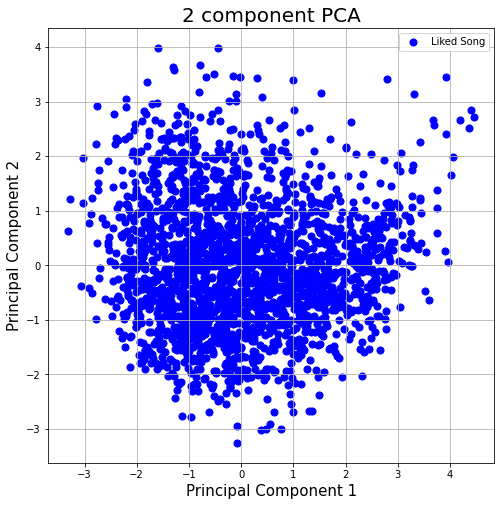

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['b', 'g', 'r', 'c']
for genre, color in zip(all_different_name_playlist,colors):
    indicesToKeep = finalDf['playlist'] == genre
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(all_different_name_playlist)
ax.grid()

      principal component 1  principal component 2
0                 -2.729866              -0.227751
1                 -1.565737              -1.837849
2                 -0.873670              -0.936722
3                 -1.586206               1.338218
4                 -1.231910              -0.163125
...                     ...                    ...
2212              -2.611386               0.759526
2213              -1.588740               3.981168
2214              -1.033212               0.591777
2215              -0.922759              -0.034227
2216              -1.991355              -1.090942

[2217 rows x 2 columns]


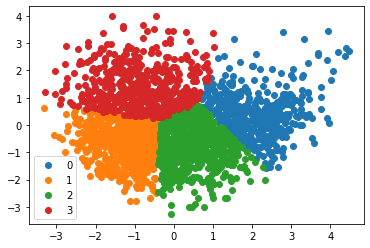

Score Silouhette =  0.34217096996136687


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
#label = kmeans.fit_predict(principalDf)
#principalDf['cluster'] = label
print(principalDf)
from sklearn.metrics import silhouette_score
cluster_labels = kmeans.fit_predict(principalDf)
u_labels = np.unique(cluster_labels)
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalDf.iloc[cluster_labels == i , 0] , principalDf.iloc[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()

silouhette = silhouette_score(principalDf, cluster_labels)

print("Score Silouhette = ",silouhette)

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

NameError: ignored

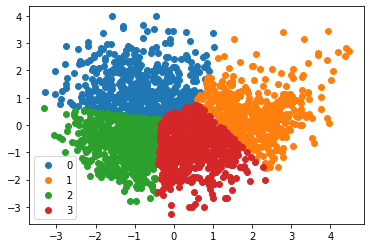

In [ ]:
#Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(principalDf)

import matplotlib.pyplot as plt
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalDf.iloc[label == i , 0] , principalDf.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

In [102]:
import spotipy.util as util
from spotipy import oauth2
from spotipy.oauth2 import SpotifyOAuth
import sys
SPOTIPY_USERNAME = '21k7i3ydatwaab2z745ne76vq'
SPOTIPY_CLIENT_ID = 'e6e434c447964a03b6284e99dee6e100'
SPOTIPY_CLIENT_SECRET = '0e4669b3dd254b679b95461d93a984ff'
SPOTIPY_REDIRECT_URI = 'http://localhost/'
SPOTIFY_AUTHORIZATION_TOKEN = "Bearer BQBusSM4hNJd3wHxAoLAvsEYNl3SJniqoBkXBig1Ry3MpZJT_0HvmyVdRD6Fpm1ItcvBiTFzCzEcIFYarYa2H1z-0MZRmHdgh7XEG4fOfF2NM_OmSFk4VT4-pMygz4J7NEhdMd0T2JiiPMH3SmuJA5aKkPyKfLHBve2CvUr2WALybwuRpZb_F9uQKfx-DPcp-Eu7feSANRLXExREa4tiVH3qQmn1qdzWGzO9cz82-zcDD3nbAC9P3PzBw4hT-jFxH6iDx9ItVq487NwFbTdqduK08j9nbXVw7QikerHRROHVbx5TvbAT2rn11FgGJ1SkMgIqE6lQq4oXrfLcWV6Yy-ZA0zUH7A"
SCOPE = 'user-library-read'
CACHE = '.spotipyoauthcache'

dfCluster = pd.concat([df, pd.DataFrame(label ,columns=["cluster"])], axis = 1)
dfCluster.to_pickle("cluster.pkl")
#a = dfCluster[dfCluster['cluster'] == 0]['track_URI'].array #https://open.spotify.com/playlist/7Lv83696FZjf6uKAoliYGv?si=fdffef0fc6904354
#b = dfCluster[dfCluster['cluster'] == 1]['track_URI'].array #https://open.spotify.com/playlist/61qNfyhARWj4wt8k9fdlGw?si=e9105349f7604003
#c = dfCluster[dfCluster['cluster'] == 2]['track_URI'].array #https://open.spotify.com/playlist/7wjEad6oyiSy6jhjGIJId7?si=b217c19018054086
#d = dfCluster[dfCluster['cluster'] == 3]['track_URI'].array #https://open.spotify.com/playlist/0nsIxiUXLiZx4ijfTT1DAB?si=34e3de643b65479c

    #to save the dataframe, df to 123.pkl
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,client_secret=SPOTIPY_CLIENT_SECRET))
#sp2 = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
#                                               client_secret=SPOTIPY_CLIENT_SECRET,
#                                               redirect_uri=SPOTIPY_REDIRECT_URI,
#                                               scope=SCOPE))
#sp.user_playlist_add_tracks(SPOTIPY_USERNAME, playlist_id="spotify:playlist:7Lv83696FZjf6uKAoliYGv", tracks=a)
#sp.user_playlist_add_tracks(SPOTIPY_USERNAME, playlist_id="spotify:playlist:61qNfyhARWj4wt8k9fdlGw", tracks=b)
#sp.user_playlist_add_tracks(SPOTIPY_USERNAME, playlist_id="spotify:playlist:7wjEad6oyiSy6jhjGIJId7", tracks=c)
#sp.user_playlist_add_tracks(SPOTIPY_USERNAME, playlist_id="spotify:playlist:0nsIxiUXLiZx4ijfTT1DAB", tracks=d)



# Nouvelle section

['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'playlist']


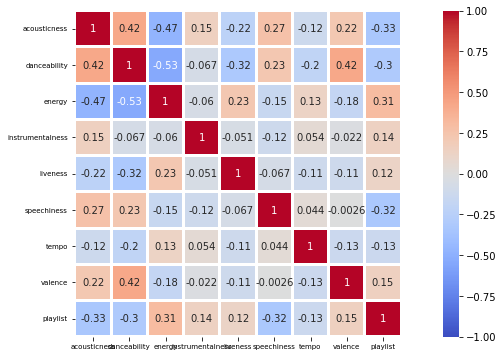

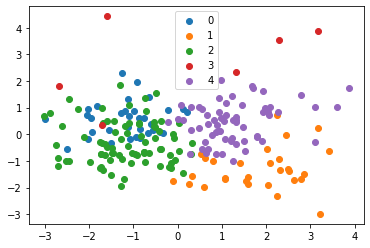

In [ ]:
# test without pca 
from sklearn.preprocessing import StandardScaler
columns_get = ['acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# Separating out the features
x = df.loc[:, columns_get].values
# Separating out the target
y = df.loc[:,['playlist']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

#Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(x)

import matplotlib.pyplot as plt
 
u_labels = np.unique(label)

# for i in u_labels:
#     plt.scatter(x.iloc[label == i , 0] , x.iloc[label == i , 1] , label = i)
# plt.legend()
# plt.show()
df_without_pca = pd.DataFrame(x)
df_without_pca['playlist'] = df['playlist']
df_without_pca['playlist'] = df_without_pca['playlist'].replace(['Mood☹️','Fresh Rap', 'Reggae Classics', 'Top Hits Rock'],[0,1,2,3])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
columns_get.append('playlist')
g = sns.heatmap(df_without_pca.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            linewidths=2,
            square=True);
print(columns_get)
g.set_xticklabels(columns_get, rotation = 0, fontsize = 7)
g.set_yticklabels(columns_get, rotation = 0, fontsize = 7)
plt.show()

for i in u_labels:
    plt.scatter(principalDf.iloc[label == i , 0] , principalDf.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

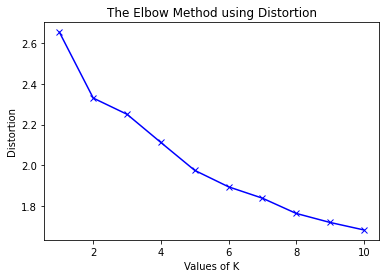

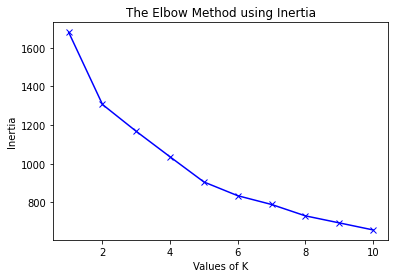

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(x) 
    kmeanModel.fit(x)     
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

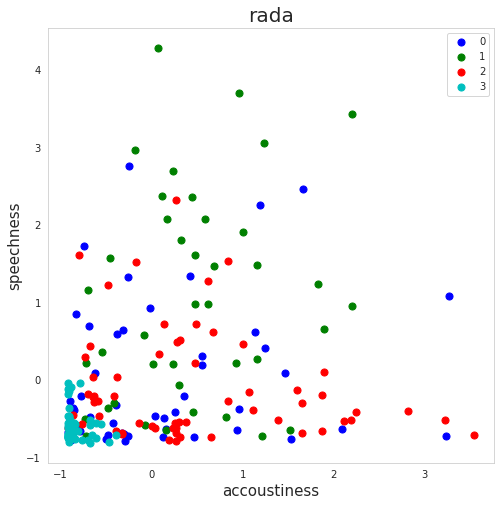

In [ ]:
playlist = [0, 1 , 2, 3, 4]
colors = ['b', 'g', 'r', 'c']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('accoustiness', fontsize = 15)
ax.set_ylabel('speechness', fontsize = 15)
ax.set_title('rada', fontsize = 20)
for p, color in zip(playlist,colors):
    indicesToKeep = df_without_pca['playlist'] == p
    ax.scatter(df_without_pca.loc[indicesToKeep, 0]
               , df_without_pca.loc[indicesToKeep, 5]
               , c = color
               , s = 50)
ax.legend(playlist)
ax.grid()
fig.show()

In [ ]:
username = '21k7i3ydatwaab2z745ne76vq'
client_id = 'e6e434c447964a03b6284e99dee6e100'
client_secret = '0e4669b3dd254b679b95461d93a984ff'
SPOTIPY_REDIRECT_URI = 'www.localhost:3000/code?='
playlist_uri = "spotify:playlist:6RSidMkiGyzsoeDH16RNNi"

columns = ['name', 'artist', 'track_URI', 'playlist', 'acousticness', 'danceability',
           'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

import io
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


def get_playlist_info(username, playlist_uri):
    # initialize vars
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                               client_secret=client_secret))

    # initialize vars
    offset = 0
    tracks, uris, names, artists = [], [], [], []

    # get playlist id and name from URI
    playlist_id = playlist_uri.split(':')[2]
    playlist_name = sp.user_playlist(username, playlist_id)['name']

    # get all tracks in given playlist (max limit is 100 at a time --> use offset)
    while True:
        results = sp.user_playlist_tracks(username, playlist_id, offset=offset)
        tracks += results['items']
        if results['next'] is not None:
            offset += 100
        else:
            break

    # get track metadata
    for track in tracks:
        names.append(track['track']['name'])
        artists.append(track['track']['artists'][0]['name'])
        uris.append(track['track']['uri'])

    return playlist_name, names, artists, uris

def pca(df):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    return principalDf

# def show_pca(df_pca):
#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(1, 1, 1)
#     ax.set_xlabel('Principal Component 1', fontsize=15)
#     ax.set_ylabel('Principal Component 2', fontsize=15)
#     ax.set_title('2 component PCA', fontsize=20)
#     colors = ['b', 'g', 'r', 'c']
#     for genre, color in zip(all_different_name_playlist, colors):
#         indicesToKeep = finalDf['playlist'] == genre
#         ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                    , finalDf.loc[indicesToKeep, 'principal component 2']
#                    , c=color
#                    , s=50)
#     ax.legend(all_different_name_playlist)
#     ax.grid()

def search_k(principalDf):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 11)

    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(x)
        kmeanModel.fit(x)

        distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / x.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / x.shape[0]
        mapping2[k] = kmeanModel.inertia_

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

def k_means(principalDf):
    kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
    # label = kmeans.fit_predict(principalDf)
    # principalDf['cluster'] = label
    print(principalDf)
    from sklearn.metrics import silhouette_score
    cluster_labels = kmeans.fit_predict(principalDf)
    u_labels = np.unique(cluster_labels)
    # plotting the results:

    for i in u_labels:
        plt.scatter(principalDf.iloc[cluster_labels == i, 0], principalDf.iloc[cluster_labels == i, 1], label=i)
    plt.legend()
    plt.show()


playlist_name, names, artists, uris = get_playlist_info(username, playlist_uri)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
data_song = []
for uri in uris:
    data_song.append(sp.audio_features(uri)[0])
print("DATA FRAME FINIS")
df = pd.DataFrame(data_song)
columns_get = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
x = df.loc[:, columns_get].values
y = df.loc[:,['track_URI']].values
X = StandardScaler().fit_transform(x)
df_pca = pca(X)
print("PCA FINIS")
search_k(df_pca)

DATA FRAME FINIS


KeyError: ignored